# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np
import math
import random

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [2]:
data_file = "pizza_delivery_locations.csv"

In [3]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [4]:


def euclidean(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))
    for i in range(dimensions):
        res+=pow(abs(v1[i]-v2[i]),2)

    return math.sqrt(float(res))

def manhattan(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))

    for i in range(dimensions):
        res+=abs(v1[i]-v2[i])

    return res


# k-means clustering
def kcluster(rows,distance=euclidean,k=4, iterations=100):
    # Determine the minimum and maximum values for each point
    ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows]))
    for i in range(len(rows[0]))]

    # Create k randomly placed centroids
    clusters=[[random.random()*(ranges[i][1]-ranges[i][0])+ranges[i][0]
                            for i in range(len(rows[0]))] for j in range(k)]
  
    lastmatches=None
    bestmatches = None

    for t in range(iterations):
        print ('Iteration %d' % t)
        bestmatches=[[] for i in range(k)]
    
        # Find which centroid is the closest for each row
        for j in range(len(rows)):
            row=rows[j]
            bestmatch=0
            for i in range(k):
                d=distance(clusters[i],row)
                if d<distance(clusters[bestmatch],row): bestmatch=i
            bestmatches[bestmatch].append(j)

        # If the results are the same as last time, this is complete
        if bestmatches==lastmatches: break
        lastmatches=bestmatches
    
        # Move the centroids to the average of the cluster members
        for i in range(k):
            avgs=[0.0]*len(rows[0])
            if len(bestmatches[i])>0:
                for rowid in bestmatches[i]:
                    for m in range(len(rows[rowid])):
                        avgs[m]+=rows[rowid][m]
                for j in range(len(avgs)):
                    avgs[j]/=len(bestmatches[i])
                clusters[i]=avgs
      
    return bestmatches

In [37]:
# clustering code for 2,3 and 4 clusters
K = 2

ks = [2,3,4]

clusters_k = [
    kcluster(data, manhattan, 2),
    kcluster(data, manhattan, 3),
    kcluster(data, manhattan, 4)
]


Iteration 0
Iteration 1
Iteration 0
Iteration 1
Iteration 0
Iteration 1


In [38]:
# Extracting best store locations for each cluster of addresses


#@param p: a dictionary, indexed by tuples that are the (x,y)
#of the centroids. the value stored at each tuple is the set
#of (x,y) values of data points in the cluster.
p = {}

for k, problem in zip(ks, clusters_k):
    locations = []
    clusters_xy = []
    p[k] = {}

    for c in problem:
        dim = [0,0]
        points_xy = []
        for obs in c:
            o = data[obs]
            
            dim[0] += o[0]
            dim[1] += o[1]
            points_xy.append((o[0], o[1]))
            
        #average
        dim = (dim[0]/len(c), dim[1]/len(c))
        
        #append point locations and centroid locations
        clusters_xy.append(points_xy)
        locations.append(dim)
        

    for j,l in enumerate(locations):
        p[k][l] = clusters_xy[j]


    
    

            
        

## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

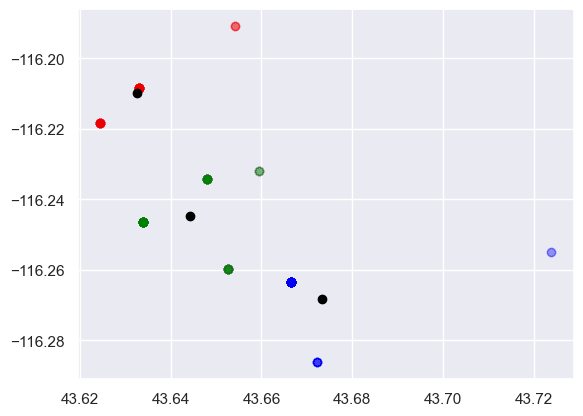

In [43]:

c_colors = ["red","green","blue","pink"]


#@param p: a dictionary, indexed by tuples that are the (x,y)
#of the centroids. the value stored at each tuple is the set
#of (x,y) values of data points in the cluster.
def display_scatterplot(p):
    
    clusters_x = []
    clusters_y = []
    
    for key, value in p.items():

        xs = [point[0] for point in value]
        ys = [point[1] for point in value]

        clusters_x.append(xs)
        clusters_y.append(ys)
        
    for i in range(len(p.items())):

        plt.scatter(clusters_x[i], clusters_y[i],color=c_colors[i], label=i, alpha=.01)
        
    
    cxs = [centroid[0] for centroid in p]
    cys = [centroid[1] for centroid in p]
    plt.scatter(cxs, cys, color="black")


#the k value (# of clusters) of the problem you want to see
plot_k = 3    
display_scatterplot(p[plot_k])

    

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

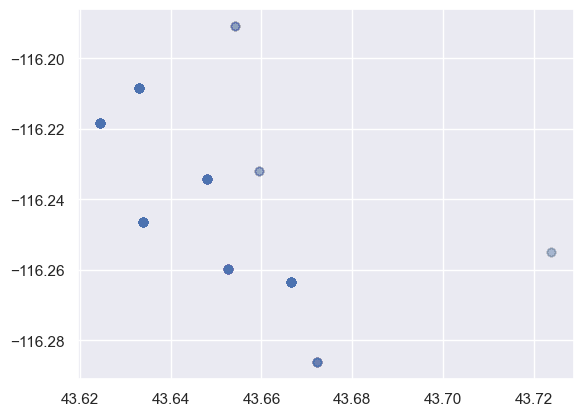

In [12]:
plt.scatter([d[0] for d in data], [d[1] for d in data], alpha=0.01)

Copyright &copy; 2024 Marina Barsky. All rights reserved.